In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from IPython.display import Image

Будем учиться классифицировать жанры музыки, полузуясь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [2]:
data = pd.read_csv("../data/raw_data/train.csv")
data.head(10)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.000000,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.000000,4,2
7,Randy Travis,On the Other Hand,55.0,0.657,0.415,5.0,-9.915,1,0.0250,0.175000,0.000006,0.1320,0.3470,96.030,3.105783,4,4
8,Professional Murder Music,Slow,29.0,0.431,0.776,10.0,-5.403,1,0.0527,0.000022,0.001300,0.1790,0.3180,120.857,237867.000000,4,8
9,Dudu Aharon,"◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î",14.0,0.716,0.885,1.0,-4.348,0,0.0333,0.061400,NaN,0.2530,0.8330,128.043,164093.000000,4,9


In [3]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Есть нулевые или пропущенные значения. Посмотрим внимательнее, в каких колонках:

In [5]:
for col in data.columns:
    print(f'NAs in {col}: {data[col].isna().sum()}')

NAs in Artist Name: 0
NAs in Track Name: 0
NAs in Popularity: 428
NAs in danceability: 0
NAs in energy: 0
NAs in key: 2014
NAs in loudness: 0
NAs in mode: 0
NAs in speechiness: 0
NAs in acousticness: 0
NAs in instrumentalness: 4377
NAs in liveness: 0
NAs in valence: 0
NAs in tempo: 0
NAs in duration_in min/ms: 0
NAs in time_signature: 0
NAs in Class: 0


В целом, можно удалить пропущенные значения, но попробуем оставить, ведь деревья неплохо умеют справляться с NaN.

In [6]:
for col in data.columns:
    print(f'Unique values in {col}: {data[col].unique().shape[0]}')

Unique values in Artist Name: 9149
Unique values in Track Name: 15129
Unique values in Popularity: 101
Unique values in danceability: 909
Unique values in energy: 1208
Unique values in key: 12
Unique values in loudness: 9002
Unique values in mode: 2
Unique values in speechiness: 1194
Unique values in acousticness: 3930
Unique values in instrumentalness: 4254
Unique values in liveness: 1459
Unique values in valence: 1320
Unique values in tempo: 13562
Unique values in duration_in min/ms: 14121
Unique values in time_signature: 4
Unique values in Class: 11


У нас есть несколько категориальных переменных: key, mode, time_signature. Artist name и Track name предлагаю вообще выбросить из рассмотрения – их количество практически равно количеству сэмплов, вряд ли они несут какую-то важную инфу.

In [7]:
X, y = data.drop(['Class', 'Artist Name', 'Track Name'], axis=1), data['Class']

In [9]:
categorical_cols = ['key', 'mode', 'time_signature']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

Посмотрим на распределение признаков по классам. Оно не очень равномерное, особенно плохо представлены классы 0, 3, 4, 7.

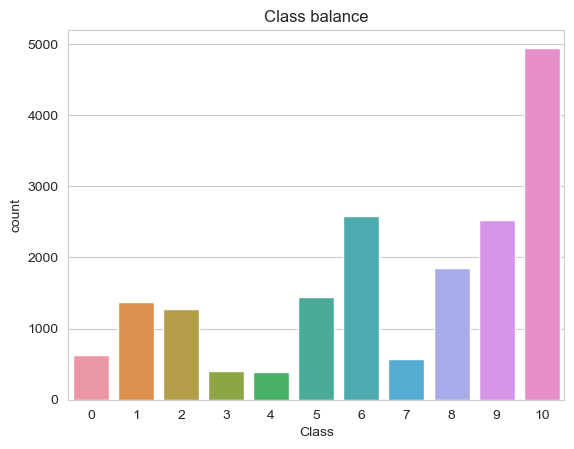

In [10]:
plt.title('Class balance')
sns.countplot(data, x='Class');

Посмотрим, как распределены непрерывные признаки:

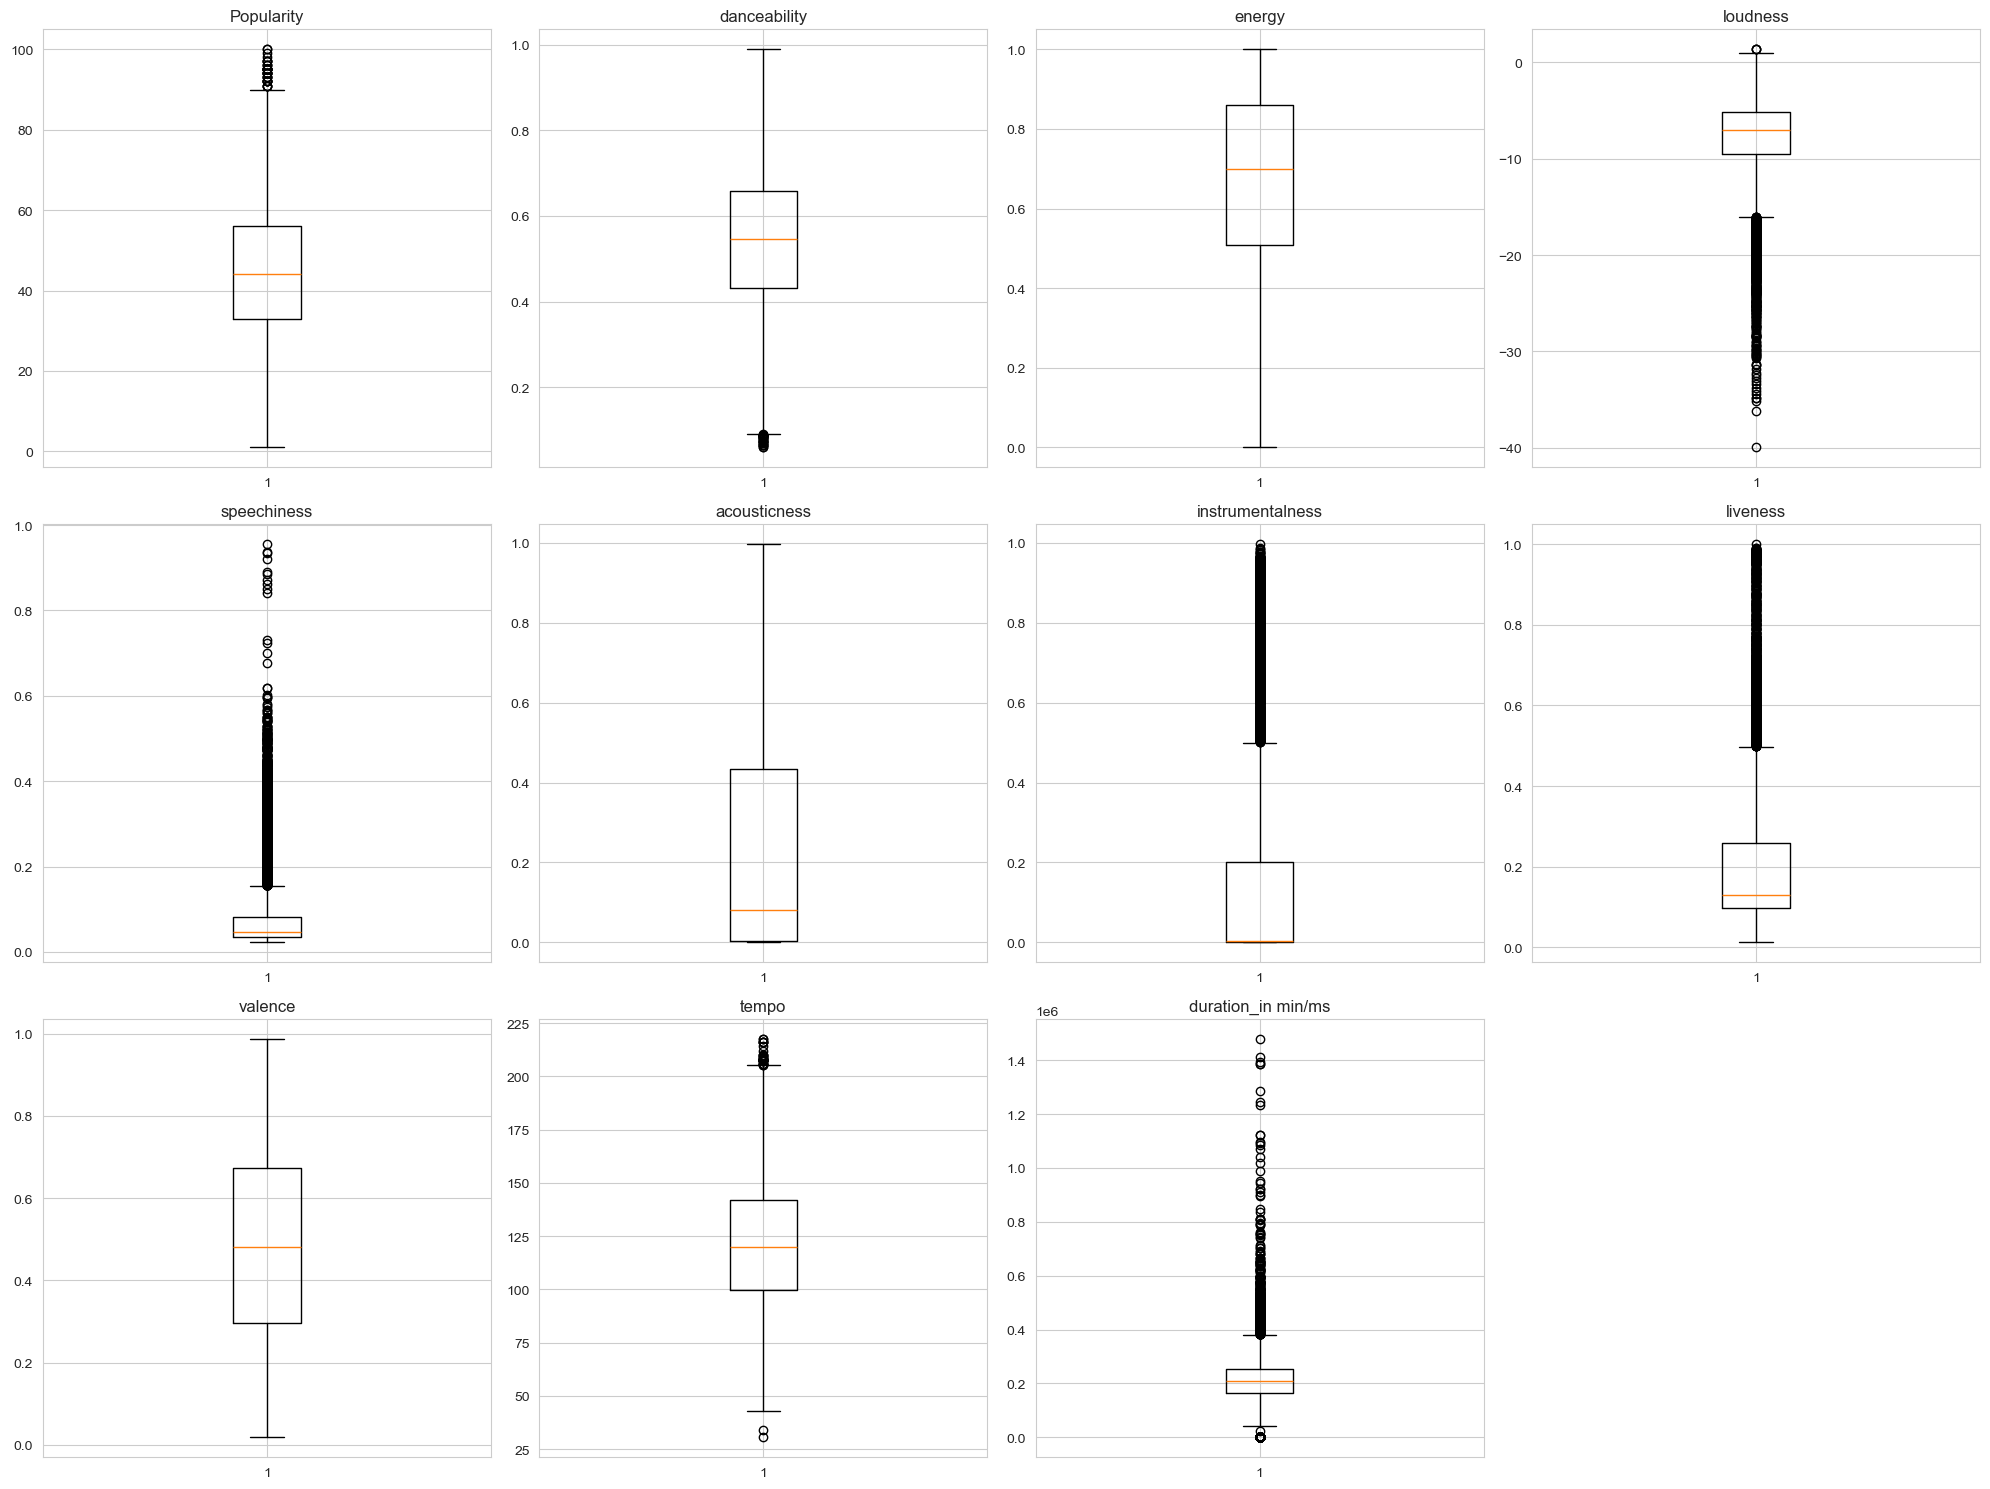

In [11]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i+1)
    plt.boxplot(X[col].dropna().to_numpy())
    plt.title(col)
    
plt.tight_layout()
plt.show()

Мне не кажется, что здесь стоит что-то выкидывать. Такая большая плотность "выбросов" - вряд ли это прям выбросы.

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Я думаю что нужно сделать разделение данных на тест и трейн с учетом не сбалансированности классов. Также предлагаю внутри трейна сделать валидационное множество, чтобы на нем смотреть различие в гиперпараметрах и финально выбирать модель для предсказания тестовых данных. Также нужно сделать стандартизацию. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Все категориальные переменные уже закодированы в датасете, нормировать данные тоже необязательно для леревьев, поэтому просто запускам GridSearchCV для подбора оптимальных параметров. Будем варьировать следующие параметры: глубину дерева (max_depth) от 1 до 10 с шагом 1, минимальное количество образцов в деревьях (min_samples_leaf) от 1 до 10 с шагом 1, максимальное количество листьев (max_leaf_nodes) от 5 до 15. KFold = 5 для кросс-валидации

In [14]:
parametrs = { 'max_depth': range (1, 10),
              'min_samples_leaf': range (1,10),
              'max_leaf_nodes': range (5,15)}

In [15]:
clf = DecisionTreeClassifier()

In [16]:
grid = GridSearchCV(clf, parametrs, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(1, 10)})

Посмотрим на получившиеся оптимальные параметры:

In [17]:
grid.best_params_

{'max_depth': 7, 'max_leaf_nodes': 12, 'min_samples_leaf': 8}

Теперь проведем классификацию тестового множества, в качестве метрики качества будем использовать f1 score, так как датасет несбалансированный по классам.

In [18]:
clf_best = DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, max_leaf_nodes=12)
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)

In [19]:
score_micro = f1_score(y_test, y_pred, average='micro')
score_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Micro-average F1 score: {score_micro}")
print(f"Weighted-average F1 score: {score_weighted}")

Micro-average F1 score: 0.42742831740386755
Weighted-average F1 score: 0.36344498531361


"Ну-ну... Ну, в принципе неплохо... Надо посмотреть, что там у других." @ Бараш


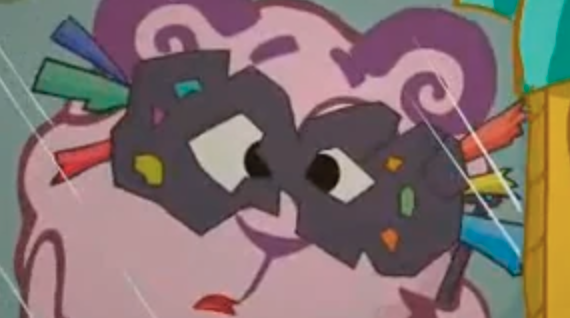

In [20]:
print('"Ну-ну... Ну, в принципе неплохо... Надо посмотреть, что там у других." @ Бараш')
Image("barash.png", width=320, height=240)

Что интересно, при разных запусках, подбирались разные параметры, и поэтому f1 score могу варьировать на 10 процентов!!

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1. Ну, очевидно, смешарики. Кто-то говорит, что фиксики лучше, но я таких людей исключаю их своего окружения.

2. Трансформеры

3. Такси

4. Форсаж

Как вам такой набор?